## Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing the following:

##### a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis
##### b. Bivariate analysis: Linear and logistic regression modeling
##### c. Multiple Regression analysis
##### d. Also compare the results of the above analysis for the two data sets
Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [7]:
# Basic statistics information
data.describe(include = ['int64','float64'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
st.mode(data)

ModeResult(mode=array([ 1.   , 99.   , 70.   ,  0.   ,  0.   , 32.   ,  0.254, 22.   ,
        0.   ]), count=array([135.,  17.,  57., 227., 374.,  13.,   6.,  72., 500.]))

In [10]:
st.skew(data)

array([ 0.89991194,  0.17341396, -1.84000523,  0.10915876,  2.26781046,
       -0.42814328,  1.9161592 ,  1.12738926,  0.6337757 ])

In [12]:
st.kurtosis(data)

array([ 0.15038274,  0.62881333,  5.13869066, -0.52449449,  7.15957492,
        3.26125742,  5.55079205,  0.63117694, -1.59832836])

In [13]:
np.var(data)

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
Outcome                         0.227186
dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome',axis = 1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [25]:
lr.score(X_test,y_test)

0.24319951497303816

In [26]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(X_train,y_train)

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
lo.score(X_test,y_test)

0.7727272727272727

In [29]:
from sklearn.metrics import classification_report

preds = lo.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.66      0.65      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



C:\Users\ACER\AppData\Local\Temp\ipykernel_6524\3066238642.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


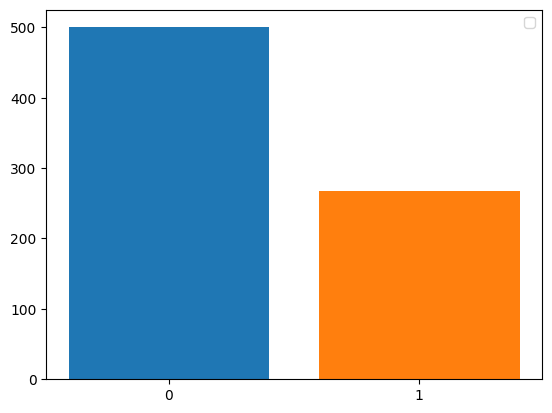

In [37]:
plt.bar(0,y.value_counts()[0])
plt.bar(1,y.value_counts()[1])
plt.legend()
plt.xticks([0,1])
plt.show()

<Axes: xlabel='BloodPressure', ylabel='count'>

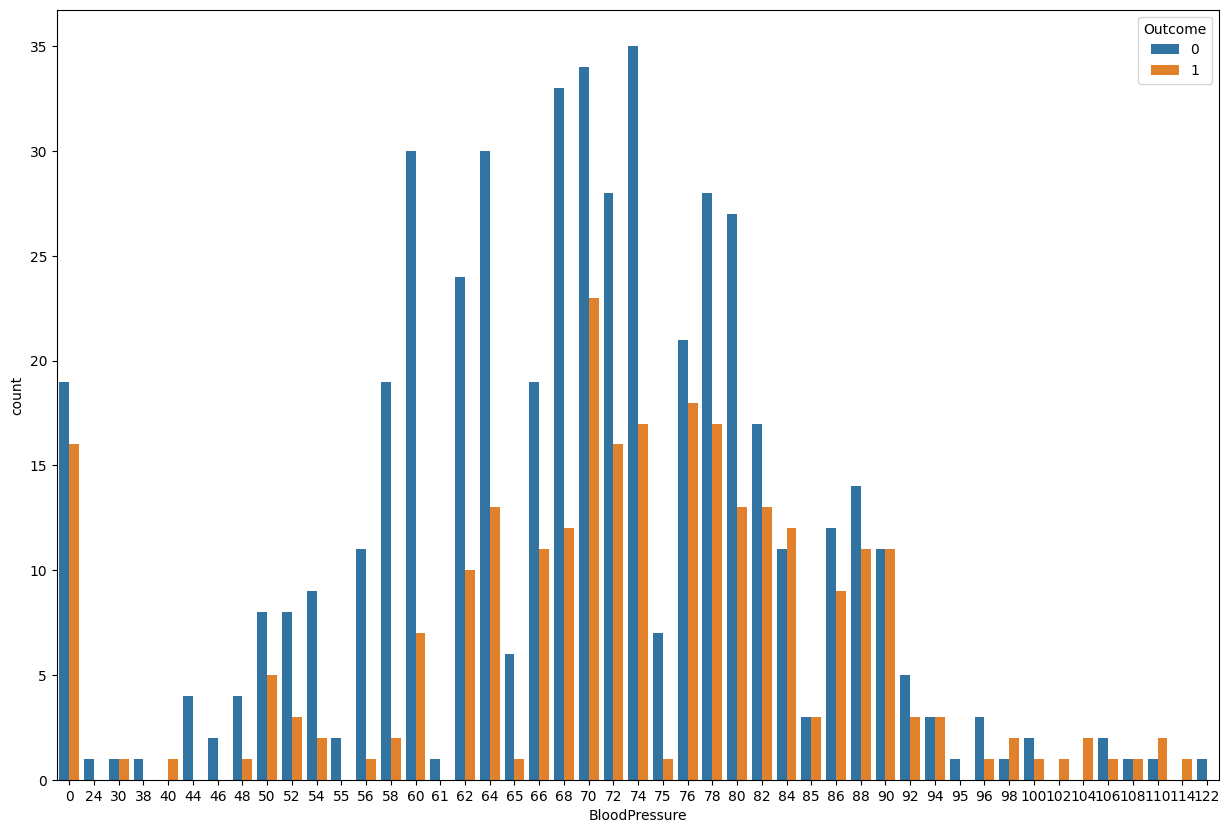

In [50]:
fig, axes = plt.subplots(figsize=(15,10))
sns.countplot(x='BloodPressure', data=data, hue='Outcome',ax=axes)